# Explore here

# TRATAMIENTO DEL DATAFRAME

In [74]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

In [76]:
print ("the total number of colums in the dataset is: ", df.shape)

the total number of colums in the dataset is:  (48895, 16)


In [ ]:
print(df.columns)

In [ ]:
# elimino duplicados --> siempre coger ID o la primera (que acopla mas info)
if df["id"].duplicated().sum() > 0:
	print("there are duplicates in the dataset")
else:
	print("there are no duplicates in the dataset")

In [ ]:
# alternativa para eliminar duplicados 
df.drop("id", axis = 1).duplicated().sum()

In [ ]:
# elimino tres columnas que considero que no aportan info (aunque esto es discrecional dependiendo del analisis que quiera llevar a cabo)
df.drop(["name", "host_name", "reviews_per_month"], axis = 1, inplace = True)
df.head()

In [ ]:
print (df.info ())

In [ ]:
print(df.columns)

# ANALISIS DE VARIABLES CATEGORICAS

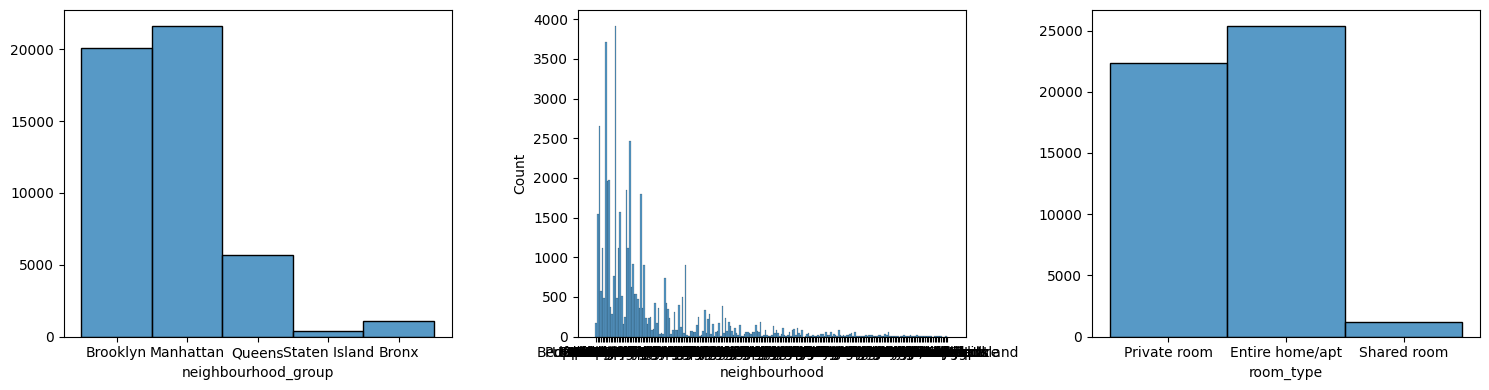

In [ ]:

# ANALISIS DE VARIABLES CATEGORICAS
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize =(15,4))

# Crear un histograma múltiple solo para las variables categóricas
if "neighbourhood_group" in df.columns:
    sns.histplot(ax = axis[0], data = df, x = "neighbourhood_group").set(ylabel = None)
if "neighbourhood" in df.columns:
    sns.histplot(ax = axis[1], data = df, x = "neighbourhood")
if "room_type" in df.columns:
    sns.histplot(ax = axis[2], data = df, x = "room_type").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

Resumen del Análisis del Gráfico
neighbourhood_group:

Muestra la cantidad de registros por grupo de vecindarios.
Identifica los grupos más y menos comunes.
neighbourhood:

Muestra la cantidad de registros por vecindario específico.
Identifica los vecindarios con más y menos registros.
room_type:

Muestra la cantidad de registros por tipo de habitación.
Revela las preferencias de los usuarios en cuanto al tipo de alojamiento.
Conclusiones
Distribución de Vecindarios:

Identifica los vecindarios y grupos de vecindarios más y menos populares.
Preferencias de Tipo de Habitación:

Muestra qué tipo de habitación es más demandada.

In [105]:
print(df.columns)

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# ANALISIS DE VARIABLES NUMERICAS

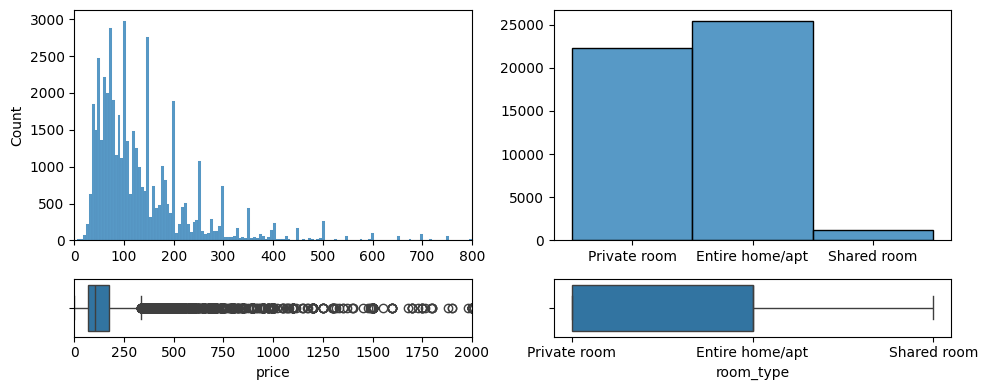

In [111]:
fig, axis = plt.subplots(2, 2, figsize =(10,4) ,gridspec_kw={'height_ratios': [4, 1]})
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "room_type").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "room_type")

# Ajustar los límites del eje x para los gráficos de la izquierda
axis[0, 0].set_xlim(0, 800)
axis[1, 0].set_xlim(0, 2000)
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

Segun los graficos de arriba, en el de la izq vemos la distribucion de los precios de las habitaciones. la mayor concentracion se encuentra oscilando entre los 0 y 400, algunos son superiores. 
en el grafico de la izquierda vemos que hay mayor concentracion de apartmentos enteros, despues de habitaciones privadas y por ultimo un numero muy reducido en comparacion de habitaciones compartidas.

In [112]:
print (df.columns)

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# ANALISIS DE VARIABLES MULTIVARIANTE

VARIABLES NUMERICAS - NUMERICAS

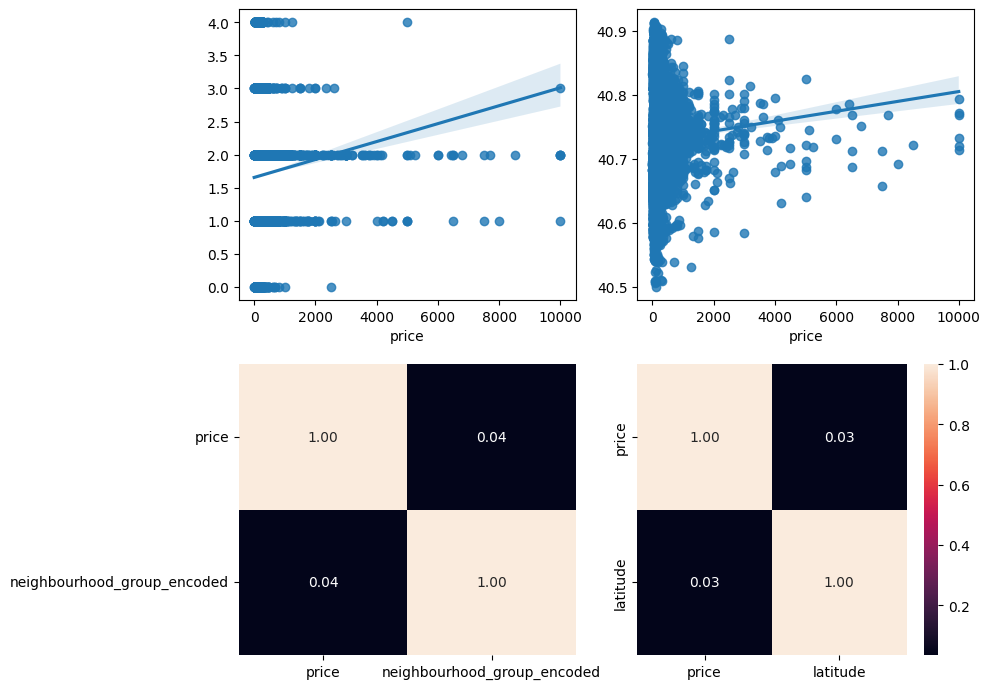

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convertir neighbourhood_group a valores numéricos
le = LabelEncoder()
df['neighbourhood_group_encoded'] = le.fit_transform(df['neighbourhood_group'])

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "price", y = "neighbourhood_group_encoded").set(ylabel=None)
sns.heatmap(df[["price", "neighbourhood_group_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x ="price", y = "latitude").set(ylabel=None)
sns.heatmap(df[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Histograma de neighbourhood_group:

Este gráfico muestra la distribución de los registros en función de los diferentes grupos de vecindarios.
Podemos observar cuál es el grupo de vecindarios más común y cuál es el menos común en el conjunto de datos.
Histograma de neighbourhood:

Este gráfico muestra la distribución de los registros en función de los diferentes vecindarios.
Nos permite identificar los vecindarios con más y menos registros en el conjunto de datos.
Histograma de room_type:

Este gráfico muestra la distribución de los registros en función de los diferentes tipos de habitaciones.
Podemos observar cuál es el tipo de habitación más común y cuál es el menos común en el conjunto de datos.
Generación y Análisis de la Matriz de Correlación
Para generar la matriz de correlación, utilizamos el método corr() de pandas. Aquí tienes el código para generar y visualizar la matriz de correlación:

VARIABLES CATEGORICO - CATEGORICO

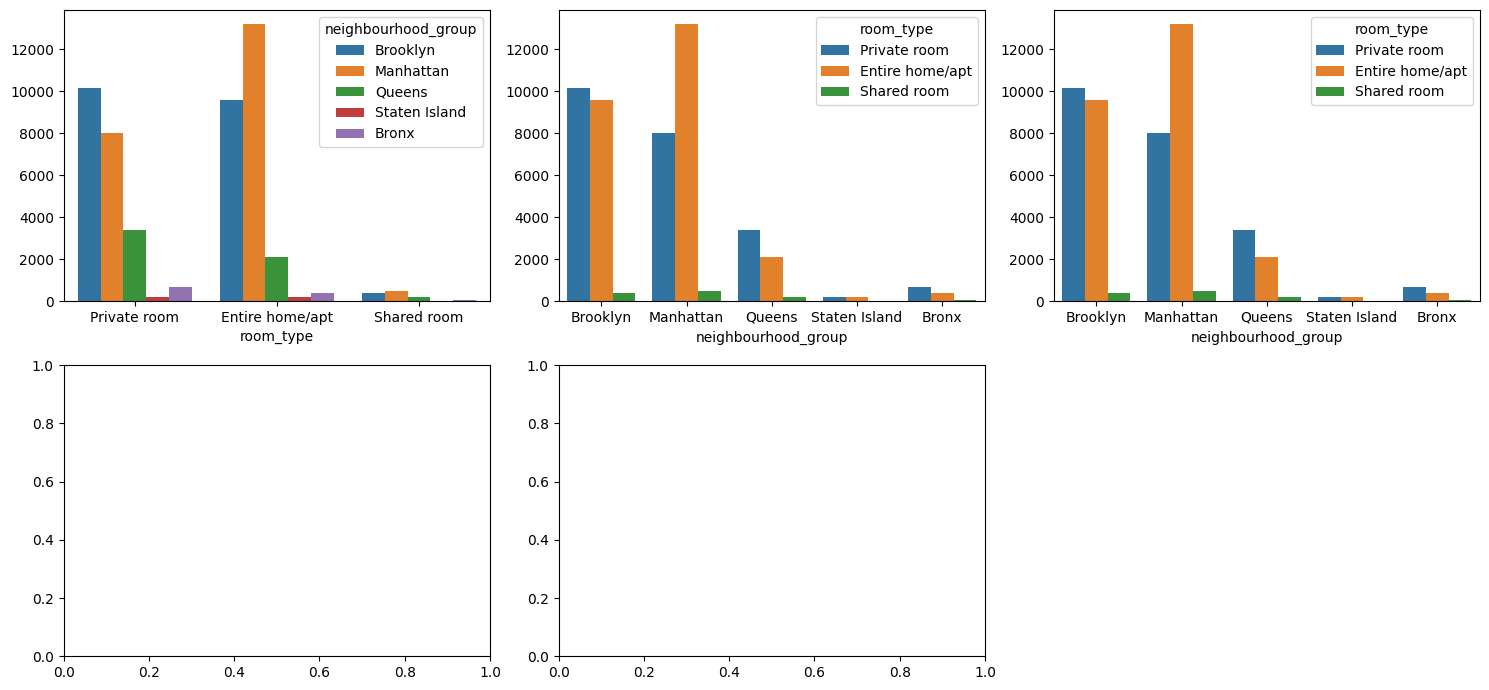

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt       
fig, axis = plt.subplots(2, 3, figsize = (15, 7))
# Crear gráficos solo si las columnas existen y no están completamente vacías
if "room_type" in df.columns and "neighbourhood_group" in df.columns and not df["room_type"].isnull().all() and not df["neighbourhood_group"].isnull().all():
    sns.countplot(ax = axis[0, 0], data = df, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)
else:
    fig.delaxes(axis[0, 0])
if "neighbourhood_group" in df.columns and "room_type" in df.columns and not df["neighbourhood_group"].isnull().all() and not df["room_type"].isnull().all():
    sns.countplot(ax = axis[0, 1], data = df, x = "neighbourhood_group", hue = "room_type").set(ylabel = None)
else:
    fig.delaxes(axis[0, 1])
if "neighbourhood_group" in df.columns and "room_type" in df.columns and not df["neighbourhood_group"].isnull().all() and not df["room_type"].isnull().all():
    sns.countplot(ax = axis[0, 2], data = df, x = "neighbourhood_group", hue = "room_type").set(ylabel = None)
else:
    fig.delaxes(axis[0, 2])
# Eliminar el subplot vacío
fig.delaxes(axis[1, 2])
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

1. Distribución de Tipos de Habitaciones por Grupo de Vecindarios: Muestra qué tipos de habitaciones son más comunes en cada grupo de vecindarios.

2. Distribución de Grupos de Vecindarios por Tipo de Habitación: Muestra qué grupos de vecindarios son más comunes para cada tipo de habitación.

Conclusiones:

a) Preferencias de Alojamiento: Algunos grupos de vecindarios tienen más habitaciones completas, otros más habitaciones privadas.

b) Popularidad de Vecindarios: Revela qué vecindarios son más populares para cada tipo de habitación.

# COMBINACIONES DE VARFIAS PREDICTORAS

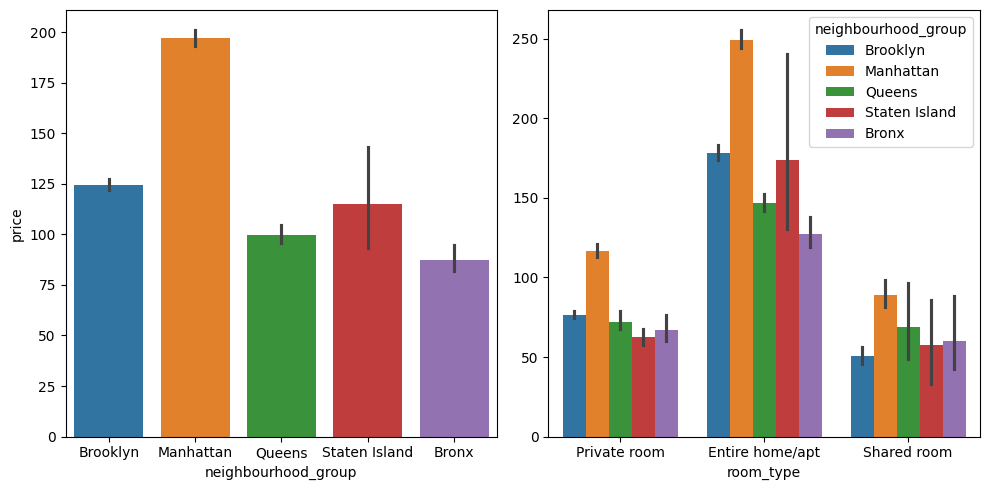

In [136]:
import seaborn as sns    
import matplotlib.pyplot as plt    

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "neighbourhood_group", y = "price", hue = "neighbourhood_group")
sns.barplot(ax = axis[1], data = df, x = "room_type", y = "price", hue = "neighbourhood_group").set(ylabel = None)

plt.tight_layout()

plt.show()

Gráfico 1: Precio por neighbourhood_group:

Muestra el precio promedio de las propiedades en cada grupo de vecindarios.
Conclusión: Revela las diferencias de precios entre los grupos de vecindarios.
Gráfico 2: Precio por room_type:

Muestra el precio promedio de las propiedades según el tipo de habitación, desglosado por grupo de vecindarios.
Conclusión: Muestra cómo varían los precios según el tipo de habitación y el grupo de vecindarios.

# ANALISIS DE CORRELACIONES

In [ ]:
import pandas as pd
import json

# Factorizar la columna 'neighbourhood_group'
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]

# Crear las reglas de transformación para la columna 'room_type'
transformation = {row["room_type"]: row["neighbourhood_group"] for _, row in df[["room_type", "neighbourhood_group"]].drop_duplicates().iterrows()}

# Guardar las reglas de transformación en un archivo JSON
with open("transformation.json", "w") as f:
    json.dump(transformation, f)

In [145]:
transformation

{'Private room': 4, 'Entire home/apt': 3, 'Shared room': 3}

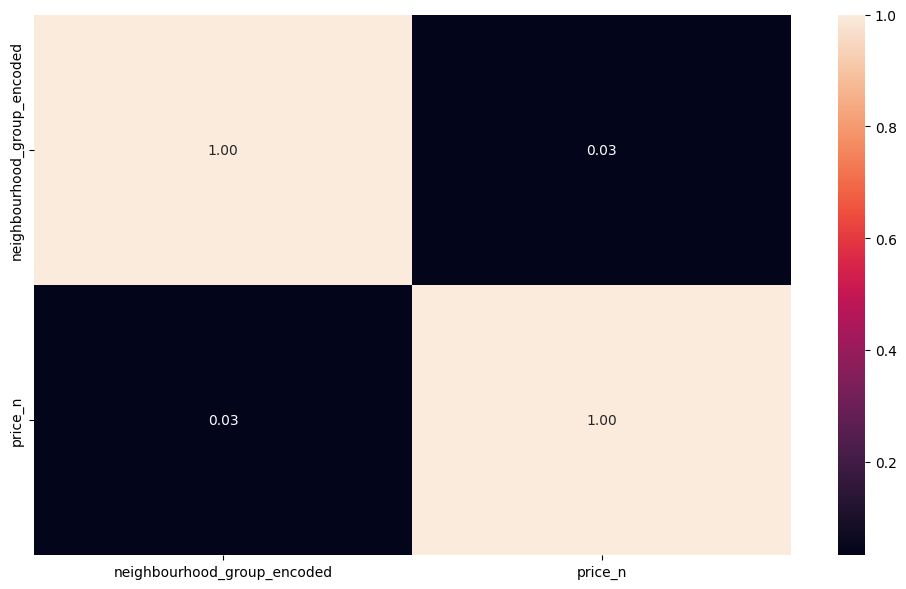

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

df["neighbourhood_group_encoded"] = pd.factorize(df["neighbourhood_group"])[0]
df["price_n"] = pd.factorize(df["price"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["neighbourhood_group_encoded", "price_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [149]:
transformation

{'Private room': 4, 'Entire home/apt': 3, 'Shared room': 3}

In [152]:
pd.factorize(list(transformation.values())[1:])[0]

C:\Users\PilarHernández\AppData\Local\Temp\ipykernel_10200\1104934455.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.factorize(list(transformation.values())[1:])[0]


array([0, 0])

# FINAL 

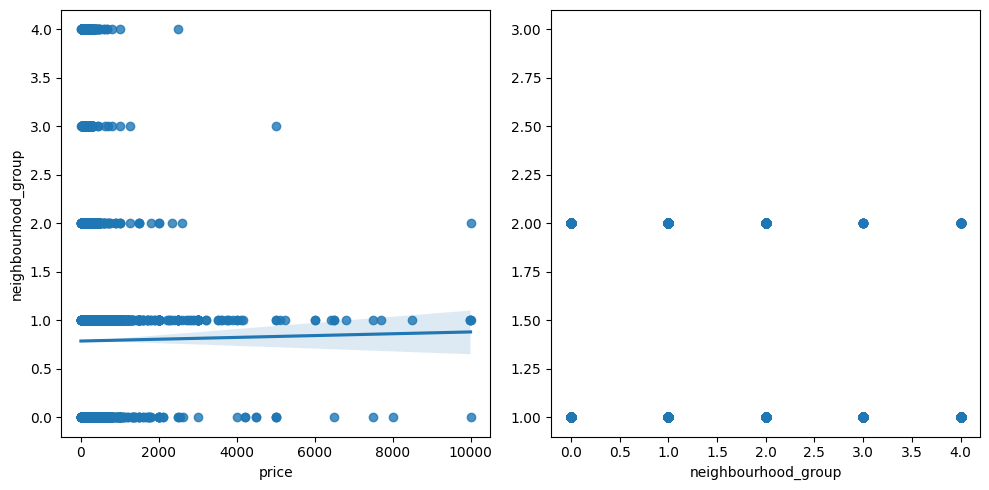

In [ ]:
import seaborn as sns     
import matplotlib.pyplot as plt           

# Convert 'room_type' to numerical values
df['room_type_encoded'] = pd.factorize(df['room_type'])[0]

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "price", y = "neighbourhood_group")
sns.regplot(ax = axis[1], data = df, x = "neighbourhood_group", y = "room_type_encoded").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

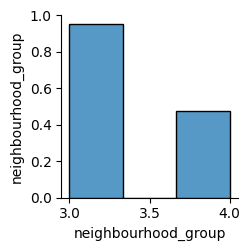

In [160]:
import seaborn as sns   
import matplotlib.pyplot as plt        
import pandas as pd

# Convert the transformation dictionary to a DataFrame
transformation_df = pd.DataFrame(list(transformation.items()), columns=['room_type', 'neighbourhood_group'])

sns.pairplot(data = transformation_df)